In [3]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Female1_Restraint_Fos_output.csv') 

In [6]:
df.columns

Index(['id', 'name', 'acronym', 'parent_structure_id', 'depth', 'count',
       'volume (mm^3)', 'density (cells/mm^3)'],
      dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=1678, step=1)

In [9]:
df.acronym.describe()

count     1678
unique    1678
top        bkd
freq         1
Name: acronym, dtype: object

In [10]:
df.id.describe()

count     1678.000000
mean      5616.380215
std       5016.603610
min         -1.000000
25%        649.250000
50%       5651.500000
75%      10649.750000
max      11303.000000
Name: id, dtype: float64

In [11]:
df.name.describe

<bound method NDFrame.describe of 0                                     background
1                                      left root
2             left Basic cell groups and regions
3                                  left Cerebrum
4                           left Cerebral cortex
                          ...                   
1673                       right third ventricle
1674                     right cerebral aqueduct
1675                      right fourth ventricle
1676                        right lateral recess
1677    right central canal, spinal cord/medulla
Name: name, Length: 1678, dtype: object>

In [19]:
df.columns

Index(['id', 'name', 'acronym', 'parent_structure_id', 'depth', 'count',
       'volume (mm^3)', 'density (cells/mm^3)'],
      dtype='object')

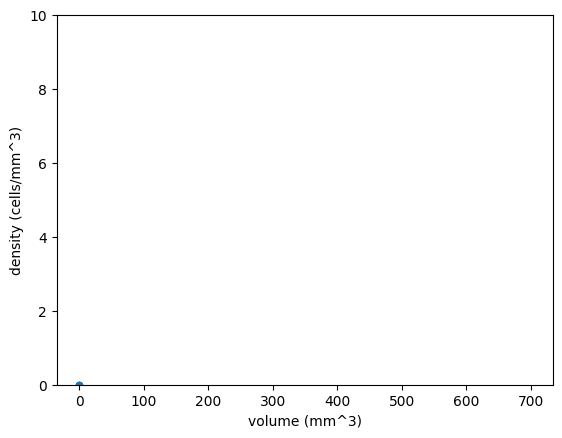

In [30]:
var = 'density (cells/mm^3)'
data = pd.concat([df['volume (mm^3)'], df['density (cells/mm^3)']], axis=1)
data.plot.scatter(x='volume (mm^3)', y='density (cells/mm^3)', ylim=(0,10));

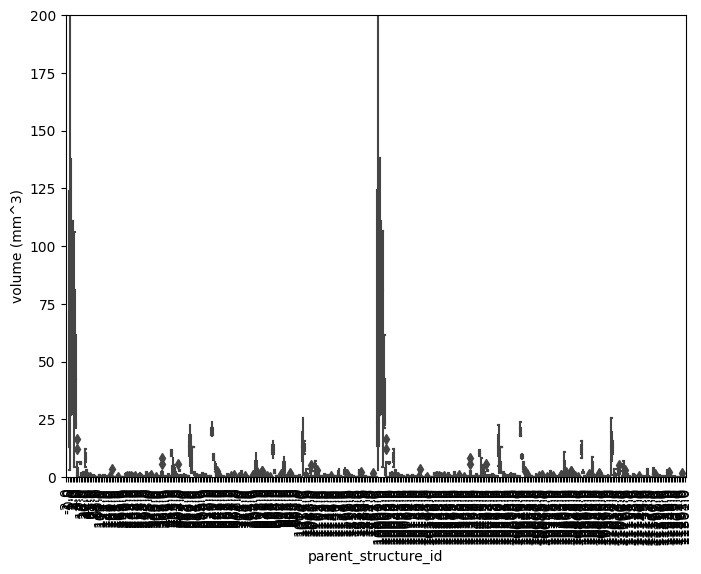

In [34]:
var = 'parent_structure_id'
data = pd.concat([df['volume (mm^3)'], df['parent_structure_id']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='parent_structure_id', y="volume (mm^3)", data=data)
fig.axis(ymin=0, ymax=200);
plt.xticks(rotation=90);


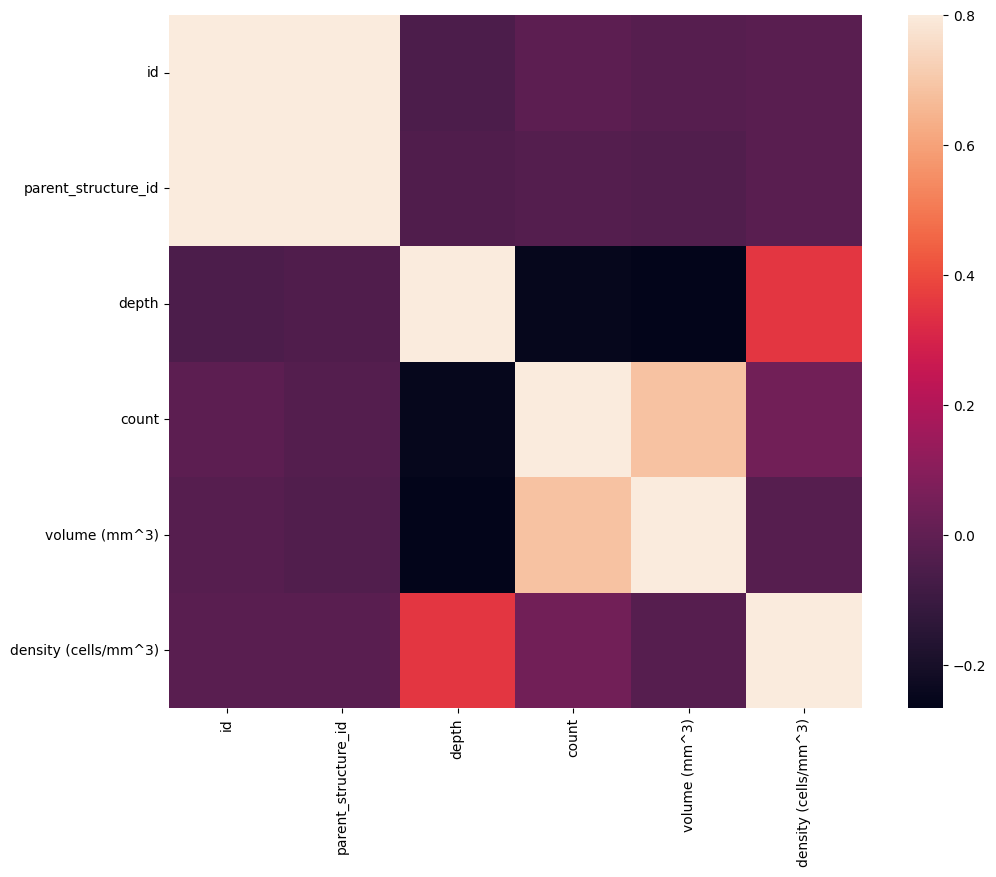

In [37]:

numeric_cols = df.select_dtypes(include='number').columns
corrmat = df[numeric_cols].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

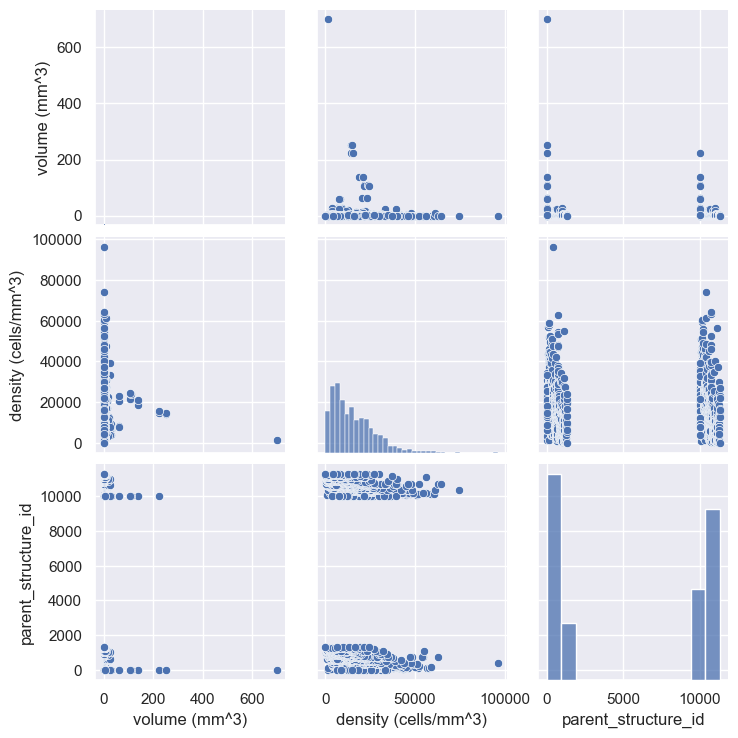

In [38]:
sns.set()
cols = ['volume (mm^3)', 'density (cells/mm^3)', 'parent_structure_id']
sns.pairplot(df[cols], size = 2.5)
plt.show();


In [43]:
# pandas for nice tables
import pandas as pd

# grab the StructureTree instance
structure_tree = mcc.get_structure_tree()

# get info on some structures
structures = structure_tree.get_structures_by_name(['Primary visual area', 'Hypothalamus'])
pd.DataFrame(structures)
from allensdk.api.queries.ontologies_api import OntologiesApi

oapi = OntologiesApi()

# get the ids of all the structure sets in the tree
structure_set_ids = structure_tree.get_structure_sets()

# query the API for information on those structure sets
pd.DataFrame(oapi.get_structure_sets(structure_set_ids))


NameError: name 'mcc' is not defined

In [44]:
# projection density: number of projecting pixels / voxel volume
pd, pd_info = mcc.get_projection_density(experiment_id)

# injection density: number of projecting pixels in injection site / voxel volume
ind, ind_info = mcc.get_injection_density(experiment_id)

# injection fraction: number of pixels in injection site / voxel volume
inf, inf_info = mcc.get_injection_fraction(experiment_id)

# data mask:
# binary mask indicating which voxels contain valid data
dm, dm_info = mcc.get_data_mask(experiment_id)

template, template_info = mcc.get_template_volume()
annot, annot_info = mcc.get_annotation_volume()

# in addition to the annotation volume, you can get binary masks for individual structures
# in this case, we'll get one for the isocortex
cortex_mask, cm_info = mcc.get_structure_mask(315)

print(pd_info)
print(pd.shape, template.shape, annot.shape)

# Look at a slice from the average template and annotation volumes

# pick a slice to show
slice_idx = 264

f, ccf_axes = plt.subplots(1, 3, figsize=(15, 6))

ccf_axes[0].imshow(template[slice_idx,:,:], cmap='gray', aspect='equal', vmin=template.min(), vmax=template.max())
ccf_axes[0].set_title("registration template")

ccf_axes[1].imshow(annot[slice_idx,:,:], cmap='gray', aspect='equal', vmin=0, vmax=2000)
ccf_axes[1].set_title("annotation volume")

ccf_axes[2].imshow(cortex_mask[slice_idx,:,:], cmap='gray', aspect='equal', vmin=0, vmax=1)
ccf_axes[2].set_title("isocortex mask")

plt.show()

NameError: name 'mcc' is not defined